## Análise dos dados

### Bibliotecas

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [237]:
import warnings
warnings.filterwarnings("ignore")

### Dataset

In [455]:
df_da = pd.read_csv('teste_indicium_precificacao.csv')
df_da.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [5]:
df_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [185]:
df_da.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

##### Para lidar com os campos nulos, optei por remover as colunas host_name e ultima_review e os registros de anúncios sem nome. Para o caso da coluna reviews_por_mes, apenas substitui os valores nulos por 0.

In [456]:
df_da.drop(columns=['host_name', 'ultima_review'], inplace=True)
df_da.dropna(subset=['nome'], inplace=True)
df_da['reviews_por_mes'].fillna(0, inplace=True)

In [115]:
df_da.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48878 entries, 0 to 48893
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48878 non-null  int64  
 1   nome                           48878 non-null  object 
 2   bairro_group                   48878 non-null  object 
 3   bairro                         48878 non-null  object 
 4   latitude                       48878 non-null  float64
 5   longitude                      48878 non-null  float64
 6   room_type                      48878 non-null  object 
 7   price                          48878 non-null  int64  
 8   minimo_noites                  48878 non-null  int64  
 9   numero_de_reviews              48878 non-null  int64  
 10  reviews_por_mes                48878 non-null  float64
 11  calculado_host_listings_count  48878 non-null  int64  
 12  disponibilidade_365            48878 non-null  int6

In [116]:
df_da.isnull().sum()

id                               0
nome                             0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

In [457]:
mais_caras = df_da.sort_values(by='price', ascending=False).head(10)
mais_caras

,id,nome,host_id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
29237,22436899,1-BR Lincoln Center,72390391,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0.00,1,83
9150,7003697,Furnished room in Astoria apartment,20582832,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,0.04,1,0
17691,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,1,0
12341,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,0.14,1,83
6529,4737930,Spanish Harlem Apt,1235070,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,0.02,1,0
40432,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,0.00,1,365
30267,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,0.18,1,251
4376,2953058,Film Location,1177497,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,0.03,11,365
29661,22779726,East 72nd Townhouse by (Hidden by Airbnb),156158778,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,0.00,12,146
42522,33007610,70' Luxury MotorYacht on the Hudson,7407743,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,7500,1,0,0.00,1,364


##### Ao selecionar os 10 anúncios com maior preço, é possível notar que eles possuem características que poderiam justificar esse valor, como o bairro e o tipo do imóvel. Entretanto, há casos de quartos privados sendo anunciados pelos preços de $ 9.999 ou $ 10.000, o que é suspeito. Por esse motivo, optei por remover todos os registros de anúncios com preços iguais ou maiores que $ 9.999.

In [ ]:
df_da = df_da[df_da['price'] < 9999]

In [458]:
mais_baratas = df_da.sort_values(by='price', ascending=True).head(10)
mais_baratas

,id,nome,host_id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
26865,21304320,Best Coliving space ever! Shared room.,101970559,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,0.26,6,139
25793,20639628,Spacious comfortable master bedroom with nice ...,86327101,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,4.28,6,176
25794,20639792,Contemporary bedroom in brownstone with nice view,86327101,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4.37,6,232
26840,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,0.11,6,333
25752,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0.53,2,0
25795,20639914,Cozy yet spacious private brownstone bedroom,86327101,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,4.35,6,222
23160,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0.05,4,28
25777,20624541,Modern apartment in the heart of Williamsburg,10132166,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,1,73
25432,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2.56,4,127
25633,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,0.71,5,0


##### Já ao listar os 10 imóveis mais baratos, notei que há anúncios com preço igual a zero, o que também é suspeito. Por esse motivo removi da análise todos os registros de anúncios com preço igual a $ 0.

In [480]:
df_da = df_da[df_da['price'] > 0]

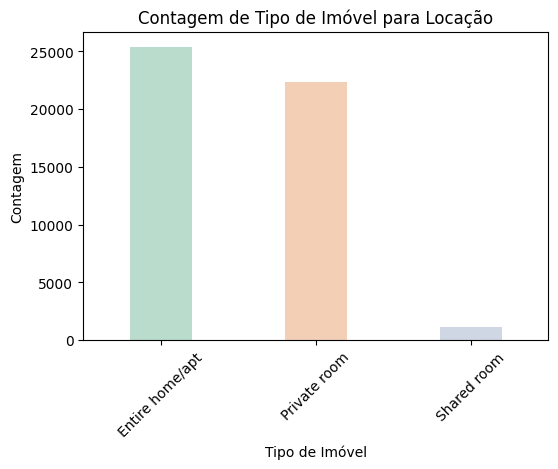

In [481]:
room_type_count = df_da['room_type'].value_counts().reset_index()
room_type_count.columns = ['room_type', 'count']
plt.figure(figsize=(6, 4))
sns.barplot(x='room_type', y='count', data=room_type_count, palette="Pastel2", width=0.4)
plt.title('Contagem de Tipo de Imóvel para Locação')
plt.xlabel('Tipo de Imóvel')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

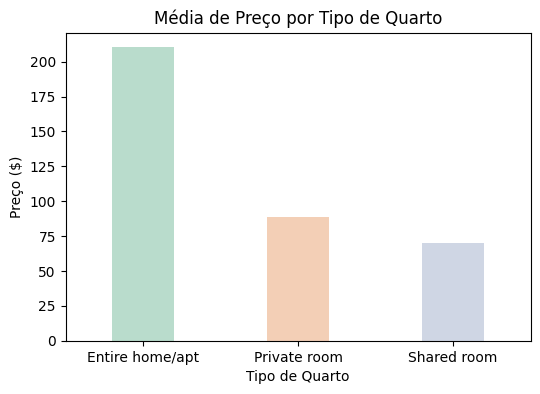

In [492]:
room_type_avg = df_da.groupby('room_type')['price'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(x='room_type', y='price', data=room_type_avg, palette="Pastel2", width=0.4)
plt.title('Média de Preço por Tipo de Quarto')
plt.xlabel("Tipo de Quarto")
plt.ylabel("Preço ($)")
plt.show()

##### Em relação ao tipo de imóvel, é possível observar que há poucos anúncios de quartos compartilhados na região e que, como esperado, anúncios de imóveis completos possuem os maiores preços.

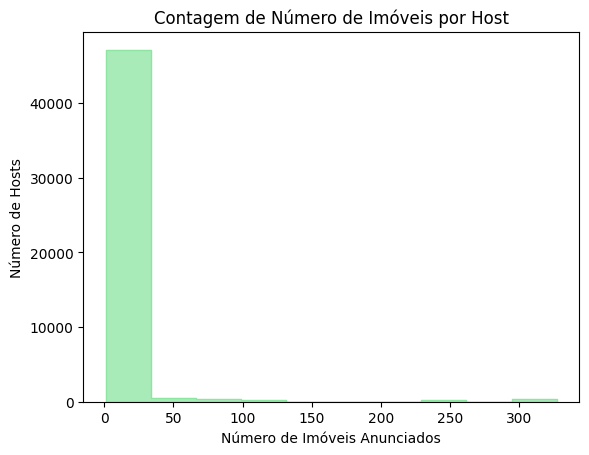

In [463]:
sns.histplot(df_da['calculado_host_listings_count'], bins=10, kde=False, palette="Paired", element="step", color="#8de5a1")
plt.title("Contagem de Número de Imóveis por Host")
plt.xlabel("Número de Imóveis Anunciados")
plt.ylabel("Número de Hosts")
plt.show()

##### Ao avaliar a contagem de anúncios por hosts, nota-se que a maioria dos hosts possui até 30 imóveis anunciados. O que se destaca no gráfico, do meu ponto de vista, é a existencia de hosts com mais de 100 imóveis anunciados.

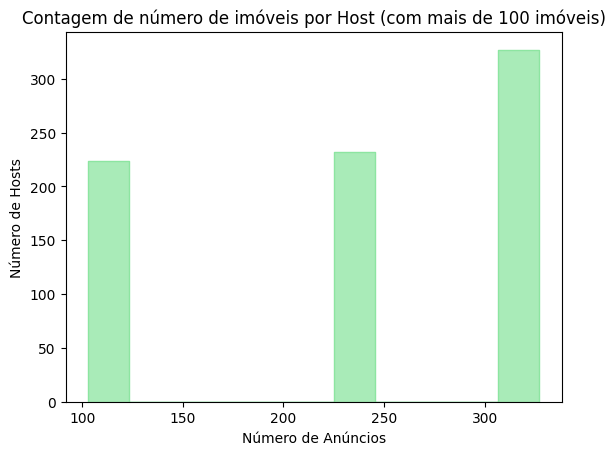

In [489]:
calculado_HLC_1 = df_da[df_da['calculado_host_listings_count'] > 100]
sns.histplot(calculado_HLC_1['calculado_host_listings_count'], kde=False, element="step", color="#8de5a1")
plt.title("Contagem de número de imóveis por Host (com mais de 100 imóveis)")
plt.xlabel("Número de Anúncios")
plt.ylabel("Número de Hosts")
plt.show()

##### Ao plotar, então, a contagem de anúncios de hosts com mais de 100 imóveis, nota-se uma quantidade expressiva de anúncios de um mesmo host.

In [446]:
top_10_hosts = df_da['host_id'].value_counts().head(10).reset_index()
top_10_hosts.columns = ['host_id', 'listing_count']
contagem_bairro = df_da[df_da['host_id'].isin(top_10_hosts['host_id'])]
contagem_bairro = contagem_bairro.groupby(['host_id', 'bairro_group']).size().reset_index(name='imoveis_bairro')
top_10_hosts = top_10_hosts.merge(contagem_bairro, on='host_id', how='left')
top_10_hosts


,host_id,listing_count,bairro_group,imoveis_bairro
0,219517861,327,Manhattan,327
1,107434423,232,Brooklyn,2
2,107434423,232,Manhattan,230
3,30283594,121,Manhattan,121
4,137358866,103,Brooklyn,6
5,137358866,103,Manhattan,18
6,137358866,103,Queens,79
7,12243051,96,Manhattan,96
8,16098958,96,Manhattan,96
9,61391963,91,Manhattan,91


##### Decidi, então, listar os 10 hosts com maior número de anúncios na plataforma. Destaca-se o fato de haver um único responsável por administrar mais de 300 imóveis para aluguel e a predominância dos anúncios no bairro de Manhattan.

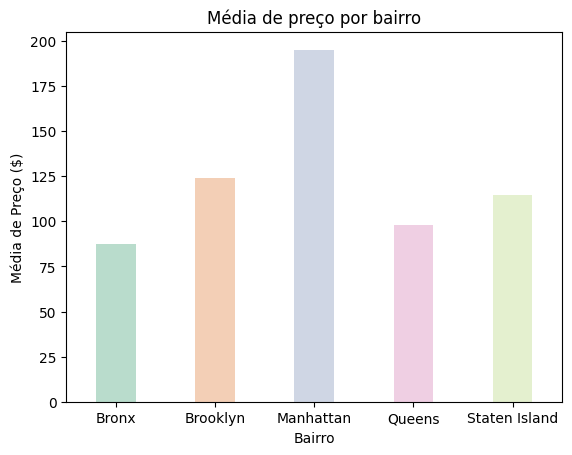

In [493]:
neighbor_price_avg = df_da.groupby('bairro_group')['price'].mean().reset_index()
sns.barplot(x='bairro_group', y='price', data=neighbor_price_avg, palette="Pastel2", width=0.4)
plt.title('Média de preço por bairro')
plt.xlabel("Bairro")
plt.ylabel("Média de Preço ($)")
plt.show()

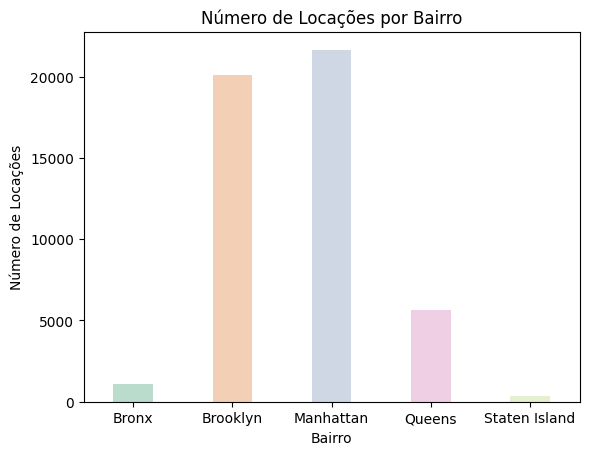

In [494]:
rents_per_neighborhood = df_da.groupby('bairro_group').size().reset_index(name='rent_count')
sns.barplot(x='bairro_group', y='rent_count', data=rents_per_neighborhood, palette="Pastel2", width=0.4)
plt.title('Número de Locações por Bairro')
plt.xlabel("Bairro")
plt.ylabel("Número de Locações")
plt.show()

#### A partir dos dois gráficos, o melhor bairro para investimento seria Manhattan dado que, além de ter a maior média de preços, também é o bairro mais procurado pelos locatários. 

<Axes: >

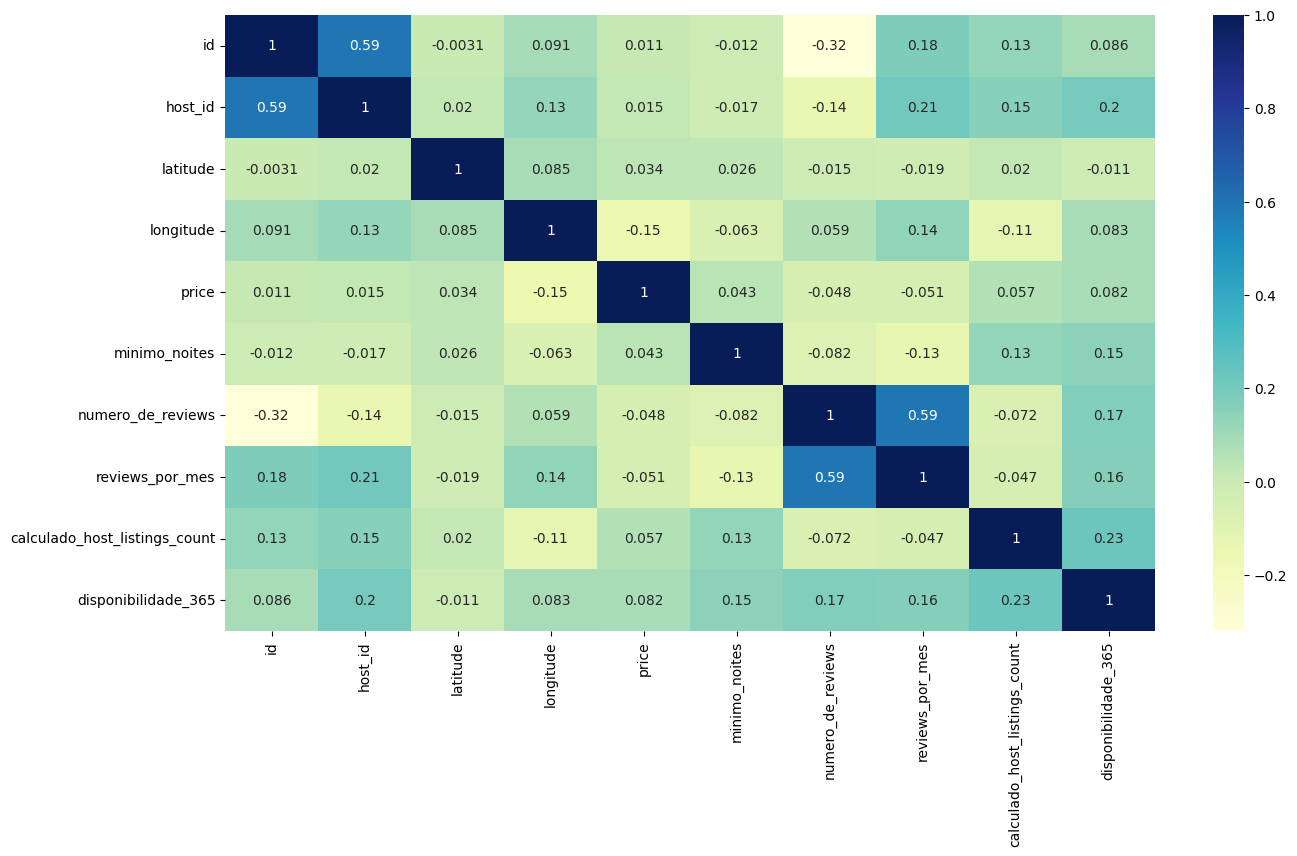

In [467]:
correlation = df_da.select_dtypes(include=['number']).corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation, annot=True, cmap="YlGnBu")

In [468]:
df_da = pd.concat([df_da, pd.get_dummies(df_da[['room_type', 'bairro_group']])], axis=1)

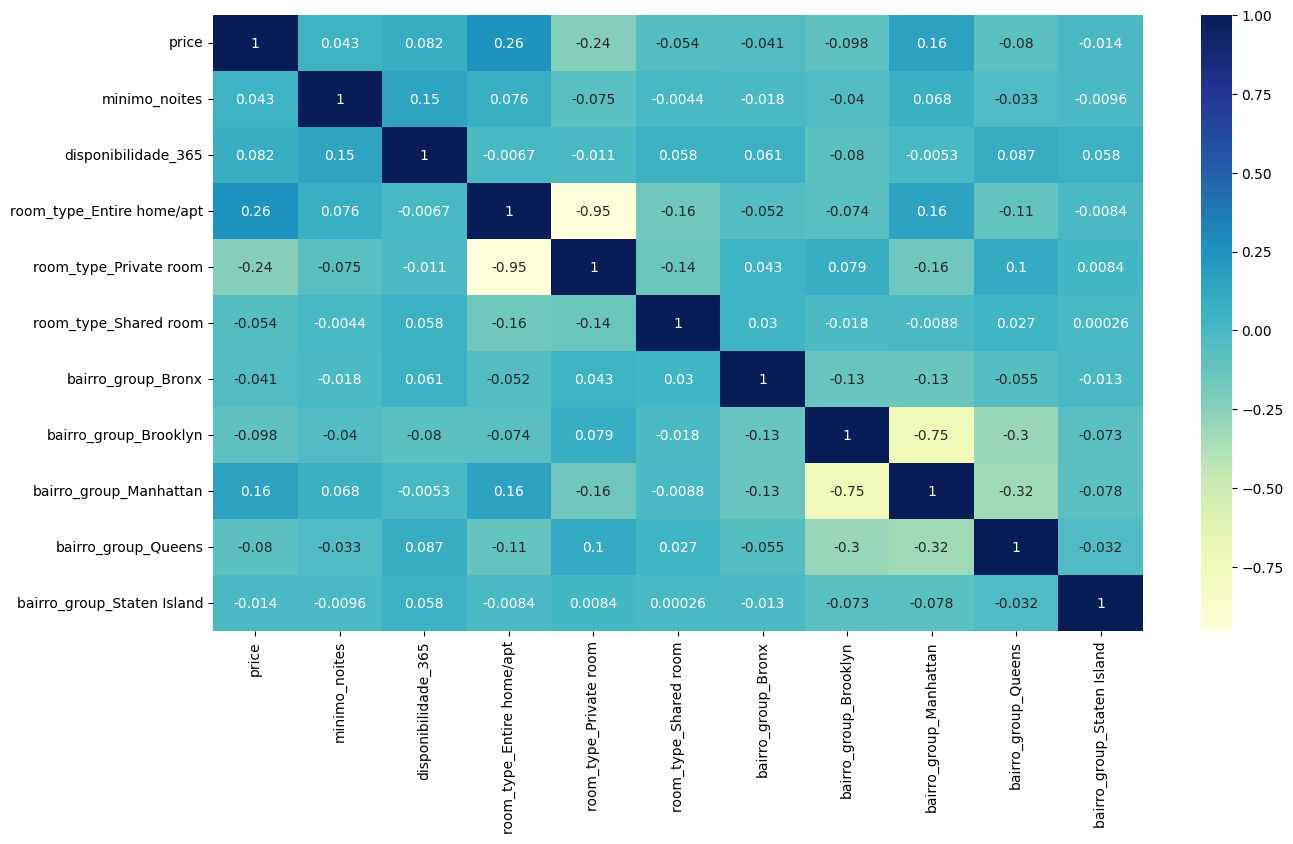

In [469]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_da.iloc[:, [8, 9, 13, 14, 15, 16, 17, 18, 19, 20, 21]].corr(), annot=True, cmap="YlGnBu")
plt.show()

#### A partir do primeiro mapa de calor de correlação entre variáveis, é possível observar que a disponibilidade interfere mais no preço do que o número mínimo de noites por locação mas, ao avaliar também as variáveis as quais presumi serem mais influentes, essa interferência não é tão significativa quando o fato da locação ser em Manhattan e envolver o imóvel completo.

In [470]:
most_expensive_houses = df_da.sort_values(by='price', ascending=False).head(500)
most_expensive_houses

,id,nome,host_id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,...,calculado_host_listings_count,disponibilidade_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island
17691,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,...,1,0,True,False,False,False,True,False,False,False
29237,22436899,1-BR Lincoln Center,72390391,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,...,1,83,True,False,False,False,False,True,False,False
9150,7003697,Furnished room in Astoria apartment,20582832,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,...,1,0,False,True,False,False,False,False,True,False
6529,4737930,Spanish Harlem Apt,1235070,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,...,1,0,True,False,False,False,False,True,False,False
40432,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,...,1,365,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,5041891,Historic Upper West Side Townhouse,26031034,Manhattan,Upper West Side,40.79693,-73.96348,Entire home/apt,795,4,...,1,249,True,False,False,False,False,True,False,False
18411,14473548,Luxury 2BR/2BATH TownhousUpper East Side Manha...,89196907,Manhattan,Upper East Side,40.76130,-73.96414,Entire home/apt,795,4,...,1,340,True,False,False,False,False,True,False,False
24906,19964849,Modern large 2 bedroom steps from Central Park!,45752004,Manhattan,Upper East Side,40.77285,-73.95566,Entire home/apt,795,2,...,1,268,True,False,False,False,False,True,False,False
42864,33279205,NYC Luxury | Penthouse Suite + Private Outdoor...,239660813,Manhattan,Hell's Kitchen,40.75955,-73.99667,Private room,794,1,...,10,200,False,True,False,False,False,True,False,False


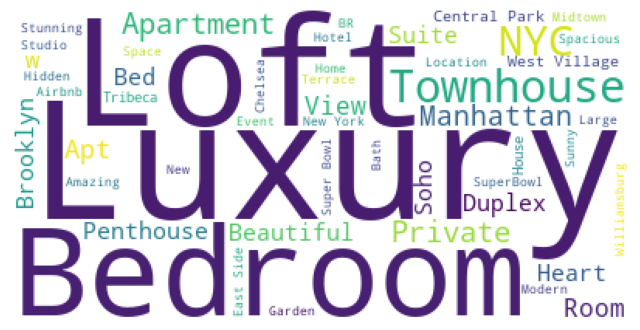

In [498]:
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
nomes = " ".join(str(each) for each in most_expensive_houses.nome)
wordcloud = WordCloud(width=400, height=200, background_color='white', max_words=50).generate(nomes)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### A nuvem de palavras traz os principais termos utilizados no nome das locações e, a partir dela, é possível identificar que o termo 'Luxury' é frequentemente utilizado nos anúncios de imóveis mais caros, além de 'Loft' e 'Bedroom'. Também é possível observar o termo 'Manhattan' que, como visto anteriormente, é o bairro com a maior média de preço por locação.

## Modelo de predição de preços

##### A previsão dos preços foi feita utilizando aprendizado de máquina a partir de modelos de Regressão Linear e Random Forest. 

##### As variáveis que optei por utilizar foram as relacionadas à localidade do imóvel, suas características (imóvel completo, quarto privado e quarto compartilhado), número de reviews por mês e total, mínimo de noites para locação, a contagem de imóveis do mesmo host e a disponibilidade do imóvel no período de um ano. Foram descartadas as informações de nome do anúncio do imóvel, de ID e nome dos hosts, o bairro e a data da última review. Não foram utilizadas outras fontes de dados.

##### As variáveis de número mínimo de noites para locação, número de reviews por mês e total, a contagem de hosts e o preço foram transformados utilizando a base do logarítimo natural como uma forma de lidar com a assimetria da distribuição dos dados. Registros nulos foram excluídos assim como anúncios com preço igual a zero.

##### Além disso, as variáveis relacionadas ao tipo de quarto e a localização (grupo do bairro) foram transformadas de categóricas para numéricas para serem utilizadas no modelo.

##### Para resolver o problema de regressão, utilizei os modelos de Regressão Linear e Random Forest por serem mais simples de serem aplicados e interpretados por alguém que, como eu, não tem experiência com aprendizado de máquina.

##### O modelo final escolhido foi o Random Forest pois apresentou melhores resultados na avaliação a partir das medidas de performance escolhidas: MAE (Mean Absolute Error), que mede o erro absoluto entre os preços previstos e observados, (MSE) Mean Squared Error, que mede o quadrado da média do erro absoluto, e o R², que mede o potencial de explicação da variação dos preços previstos e observados pelo modelo.


### Preparando os dados

In [308]:
df_md = pd.read_csv('teste_indicium_precificacao.csv')
df_md.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [309]:
df_md.drop(columns=['host_name', 'host_id', 'ultima_review', 'nome', 'bairro'], inplace=True)
df_md = df_md[df_md['price'] > 0]
df_md.dropna(inplace=True)
df_md['reviews_por_mes'].fillna(0, inplace=True)
df_md = pd.concat([df_md, pd.get_dummies(df_md[['room_type', 'bairro_group']])], axis=1)
df_md.drop(columns=['room_type', 'bairro_group'], inplace=True)
df_md

,id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island
0,2595,40.75362,-73.98377,225,1,45,0.38,2,355,True,False,False,False,False,True,False,False
2,3831,40.68514,-73.95976,89,1,270,4.64,1,194,True,False,False,False,True,False,False,False
3,5022,40.79851,-73.94399,80,10,9,0.10,1,0,True,False,False,False,False,True,False,False
4,5099,40.74767,-73.97500,200,3,74,0.59,1,129,True,False,False,False,False,True,False,False
5,5121,40.68688,-73.95596,60,45,49,0.40,1,0,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48781,36425863,40.78099,-73.95366,129,1,1,1.00,1,147,False,True,False,False,False,True,False,False
48789,36427429,40.75104,-73.81459,45,1,1,1.00,6,339,False,True,False,False,False,False,True,False
48798,36438336,40.54179,-74.14275,235,1,1,1.00,1,87,False,True,False,False,False,False,False,True
48804,36442252,40.80787,-73.92400,100,1,2,2.00,1,40,True,False,False,True,False,False,False,False


In [293]:
df_md.isnull().sum()

id                               0
latitude                         0
longitude                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
room_type_Entire home/apt        0
room_type_Private room           0
room_type_Shared room            0
bairro_group_Bronx               0
bairro_group_Brooklyn            0
bairro_group_Manhattan           0
bairro_group_Queens              0
bairro_group_Staten Island       0
dtype: int64

<Axes: >

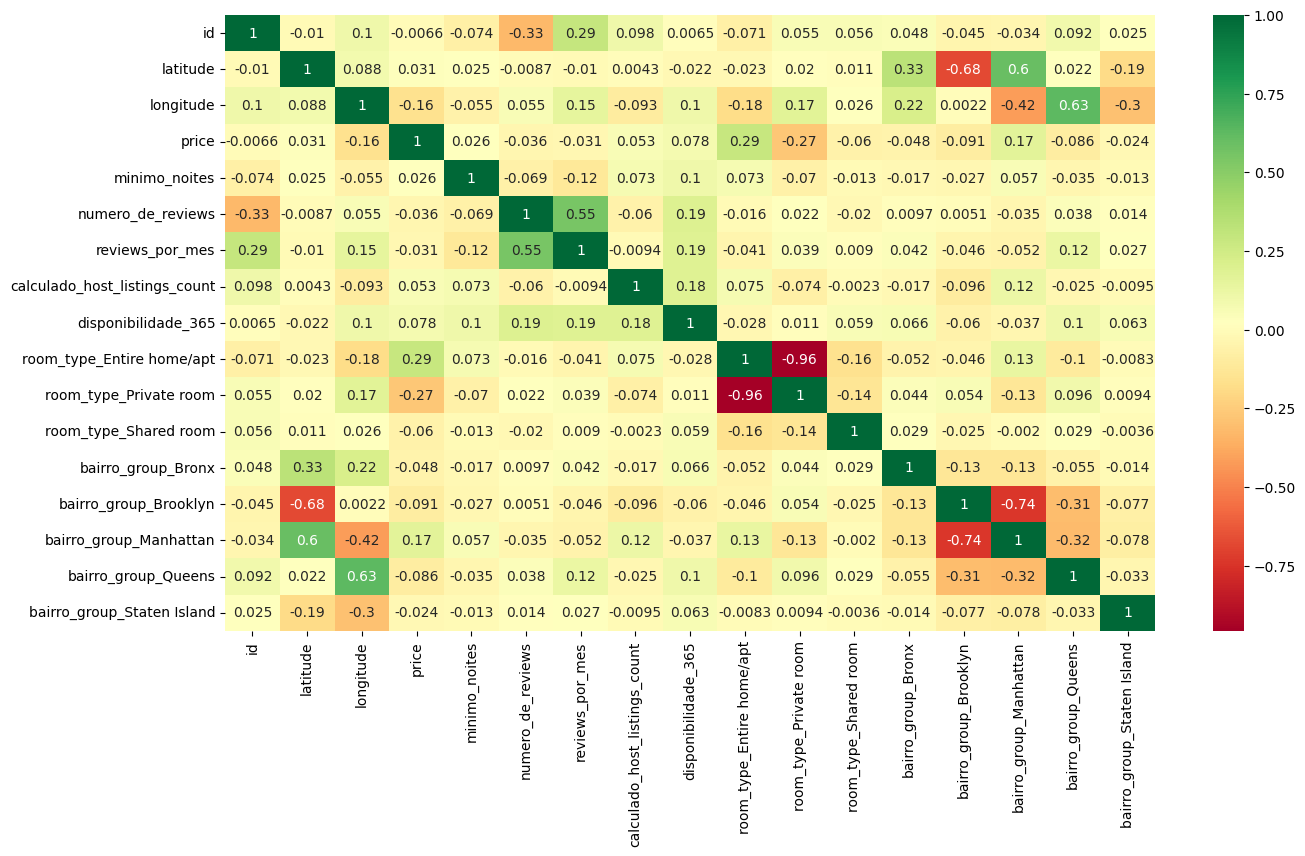

In [310]:
plt.figure(figsize=(15,8))
sns.heatmap(df_md.corr(), annot=True, cmap="RdYlGn")

##### Distribuição dos dados originais

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimo_noites'}>,
        <Axes: title={'center': 'numero_de_reviews'}>],
       [<Axes: title={'center': 'reviews_por_mes'}>,
        <Axes: title={'center': 'calculado_host_listings_count'}>,
        <Axes: title={'center': 'disponibilidade_365'}>]], dtype=object)

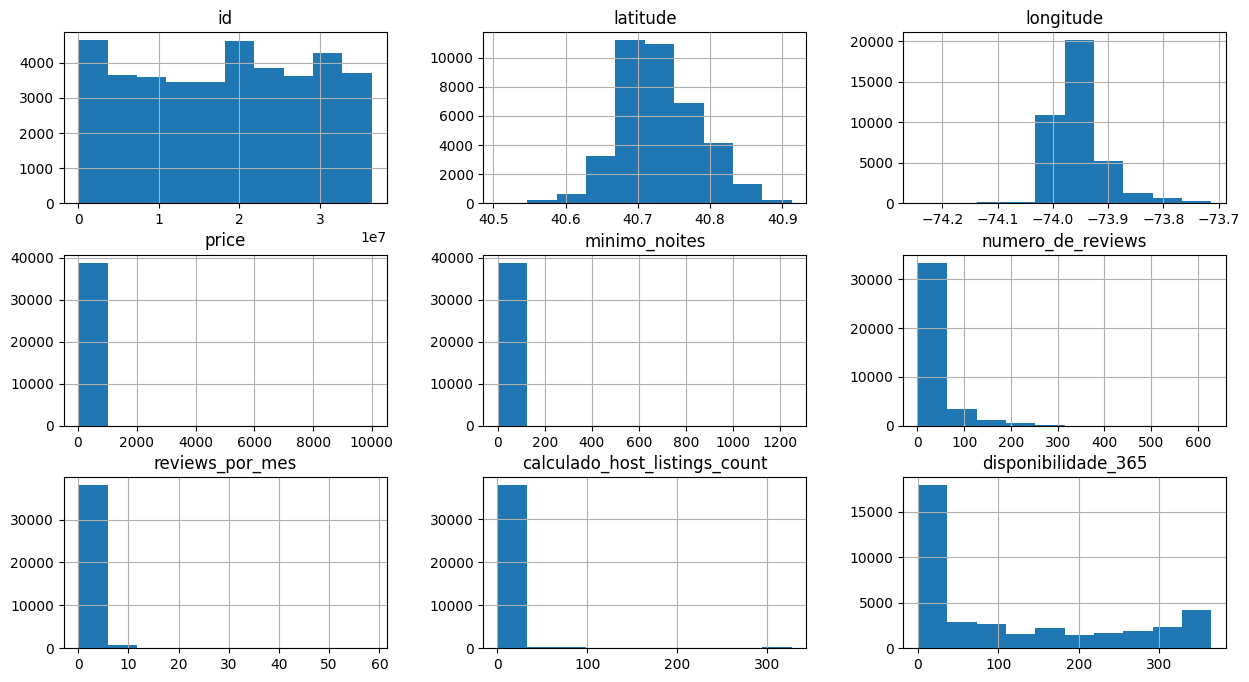

In [311]:
df_md.hist(figsize=(15,8))

##### Transformação dos dados utilizando a base do logarítimo natural

In [312]:
df_md['minimo_noites'] = np.log(df_md['minimo_noites'])
df_md['numero_de_reviews'] = np.log(df_md['numero_de_reviews'])
df_md['reviews_por_mes'] = np.log(df_md['reviews_por_mes'])
df_md['calculado_host_listings_count'] = np.log(df_md['calculado_host_listings_count'])
df_md['price'] = np.log(df_md['price'])

##### Distribuição dos dados transformados

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimo_noites'}>,
        <Axes: title={'center': 'numero_de_reviews'}>],
       [<Axes: title={'center': 'reviews_por_mes'}>,
        <Axes: title={'center': 'calculado_host_listings_count'}>,
        <Axes: title={'center': 'disponibilidade_365'}>]], dtype=object)

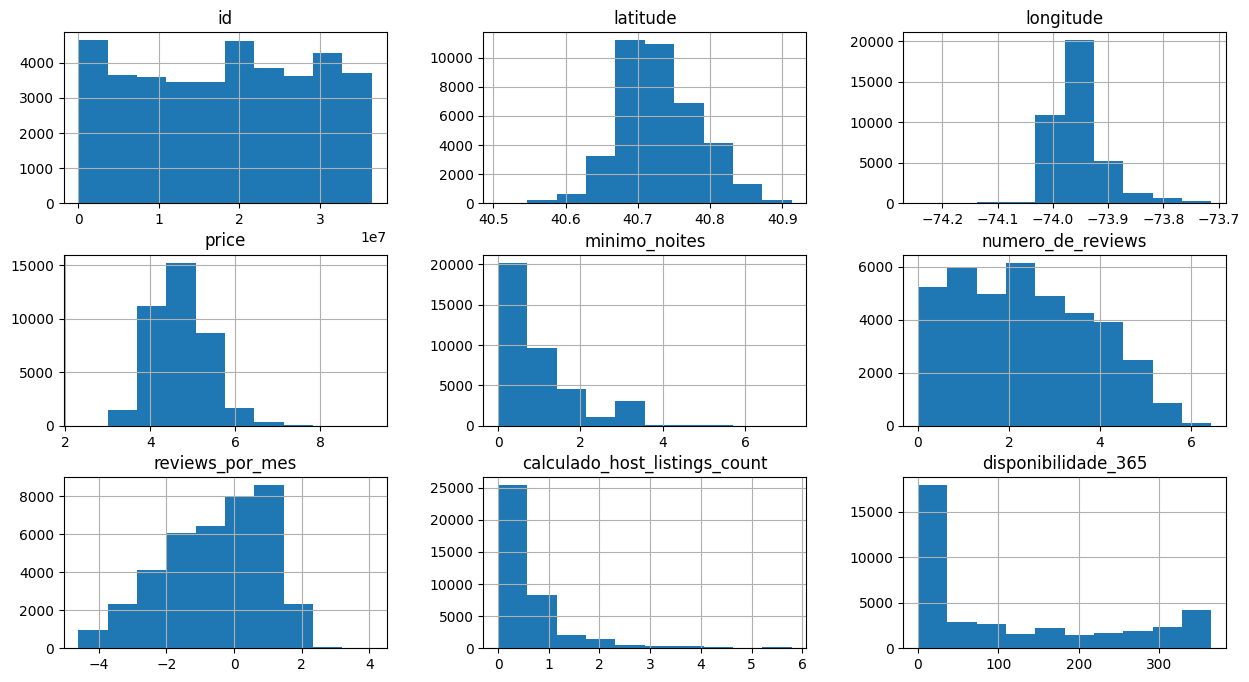

In [313]:
df_md.hist(figsize=(15,8))

### Separando dados para treino e teste

In [362]:
from sklearn.model_selection import train_test_split

x = df_md.drop(['price'], axis=1)
y = df_md['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Treinando o modelo

##### Utilizando Regressão Linear

In [369]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

reg_md = LinearRegression()
reg_md.fit(x_train, y_train)

LinearRegression()

In [372]:
y_pred_reg = reg_md.predict(x_test)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_reg))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_reg))
print("R^2 Score:", r2_score(y_test, y_pred_reg))

Mean Absolute Error (MAE): 0.340986570566106
Mean Squared Error (MSE): 0.21241914972442108
R^2 Score: 0.5226135946286206


##### Utilizando Random Forest

In [373]:
from sklearn.ensemble import RandomForestRegressor

fr_md = RandomForestRegressor()
fr_md.fit(x_train, y_train)

RandomForestRegressor()

In [375]:
y_pred_fr = fr_md.predict(x_test)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_fr))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_fr))
print("R^2 Score:", r2_score(y_test, y_pred_fr))

Mean Absolute Error (MAE): 0.2936150216158171
Mean Squared Error (MSE): 0.16238833360838703
R^2 Score: 0.6350518163916564


### Exportando o modelo escolhido (Random Forest)

In [499]:
from joblib import dump

dump(fr_md, 'modelo_price_predicting.pkl')


['modelo_price_predicting.pkl']

### Importando e utilizando o modelo escolhido

In [474]:
from joblib import load

modelo = load('modelo_price_predicting.pkl')


##### Criando o dataset do imóvel para precificação

In [475]:
input = {
    'id': [2595],
    'latitude': [40.75362],
    'longitude': [-73.98377],
    'minimo_noites':[1],
    'numero_de_reviews':[45],
    'reviews_por_mes':[0.38],
    'calculado_host_listings_count':[0.38],
    'disponibilidade_365':[355],
    'room_type_Entire home/apt': [True],
    'room_type_Private room':[False],
    'room_type_Shared room':[False],
    'bairro_group_Bronx':[False],
    'bairro_group_Brooklyn':[False],
    'bairro_group_Manhattan':[True],
    'bairro_group_Queens':[False],
    'bairro_group_Staten Island':[False]
}

input = pd.DataFrame(input)
input

,id,latitude,longitude,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island
0,2595,40.75362,-73.98377,1,45,0.38,0.38,355,True,False,False,False,False,True,False,False


##### Aplicando o modelo

In [479]:
predicao = modelo.predict(input)
preco_final = np.round(np.exp(predicao),2)

print("Preço Sugerido com Base no Modelo (em $): ", preco_final)

Preço Sugerido com Base no Modelo (em $):  [263.39]
